In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Load the terrorism dataset

In [2]:
# Load the terrorism dataset
terror = pd.read_csv('C:\Users\ramba\OneDrive\Desktop\Excel Files.csv', encoding='ISO-8859-1')


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3074719424.py, line 2)

#### Display the first few rows of the dataset

In [ ]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### **Data Preprocessing and Cleaning**

In [ ]:
# Rename columns for clarity
terror.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country',
                      'provstate': 'State', 'region_txt': 'Region', 'city': 'City', 'latitude': 'Latitude',
                      'longitude': 'Longitude', 'attacktype1_txt': 'AttackType', 'nkill': 'Killed',
                      'nwound': 'Wounded', 'target1': 'Target', 'summary': 'Summary', 'gname': 'Group',
                      'targtype1_txt': 'TargetType', 'weaptype1_txt': 'WeaponType', 'motive': 'Motive'},
              inplace=True)

In [ ]:
# Select relevant columns for analysis
terror = terror[['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude',
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'TargetType', 'WeaponType', 'Motive']]

### Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
missing_values = terror.isnull().sum()

# Explore basic statistics and information about the dataset
terror_info = terror.info()

# Identify the country with the most attacks
most_affected_country = terror['Country'].value_counts().idxmax()

# Identify the city with the most attacks
most_affected_city = terror['City'].value_counts().index[1]  # Excluding 'unknown'

# Identify the region with the most attacks
most_affected_region = terror['Region'].value_counts().idxmax()

# Identify the year with the most attacks
most_affected_year = terror['Year'].value_counts().idxmax()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181256 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   AttackType  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Target      181053 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  TargetType  181691 non-null  object 
 16  WeaponType  181691 non-null  object 
 17  Motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

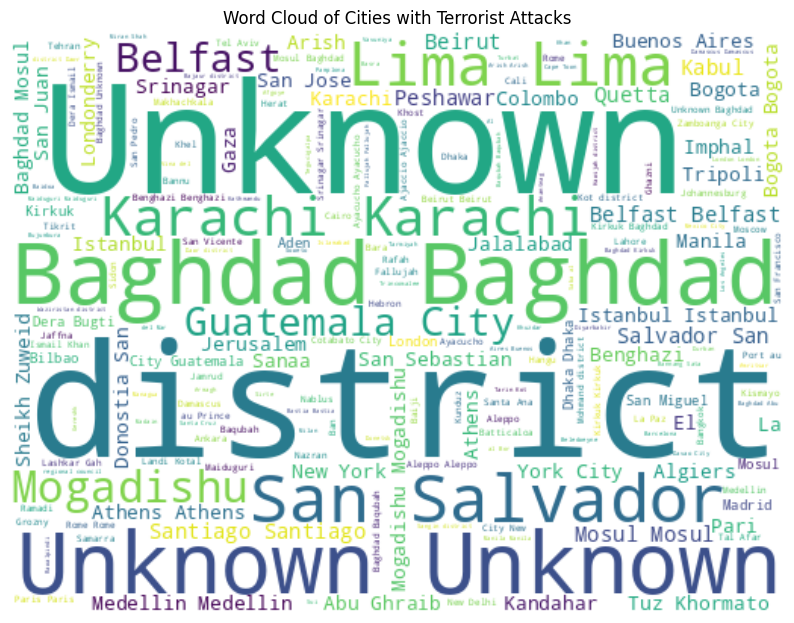

In [ ]:
# Identify the month with the most attacks
most_affected_month = terror['Month'].value_counts().idxmax()

# Identify the group responsible for the most attacks
most_active_group = terror['Group'].value_counts().index[1]

# Identify the most common attack type
most_common_attack_type = terror['AttackType'].value_counts().idxmax()

# Visualize a word cloud of city names to see the most affected cities
from wordcloud import WordCloud

cities = terror['City'].dropna()
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(' '.join(cities))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cities with Terrorist Attacks')
plt.show()


## Data Visualization

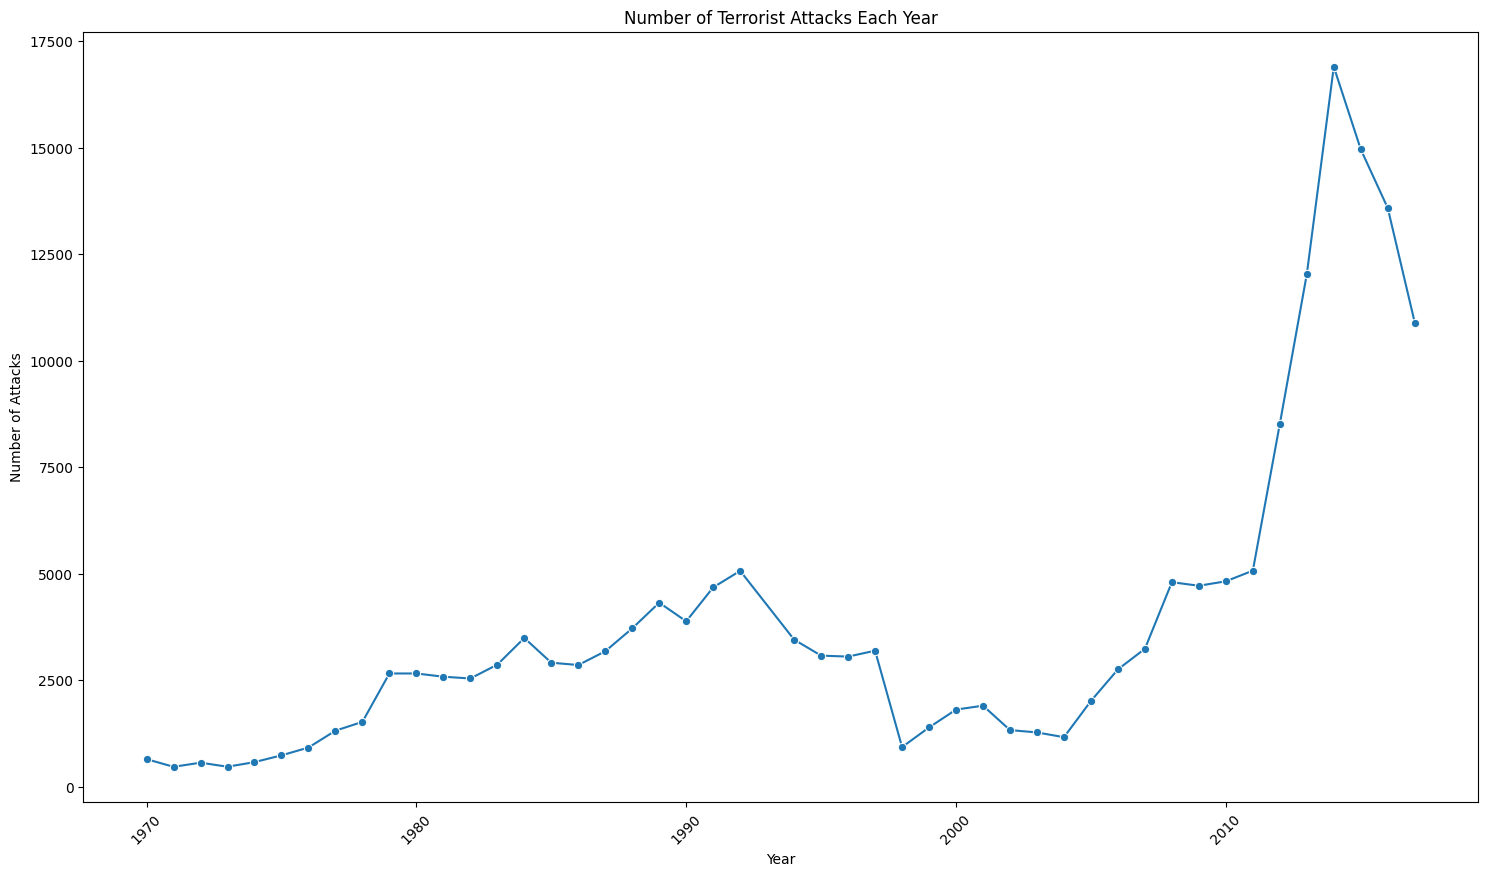

In [ ]:
# Plot the number of attacks per year using a line chart
plt.figure(figsize=(18, 10))
sns.lineplot(x=terror['Year'].value_counts().sort_index().index,
             y=terror['Year'].value_counts().sort_index().values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks Each Year')
plt.show()


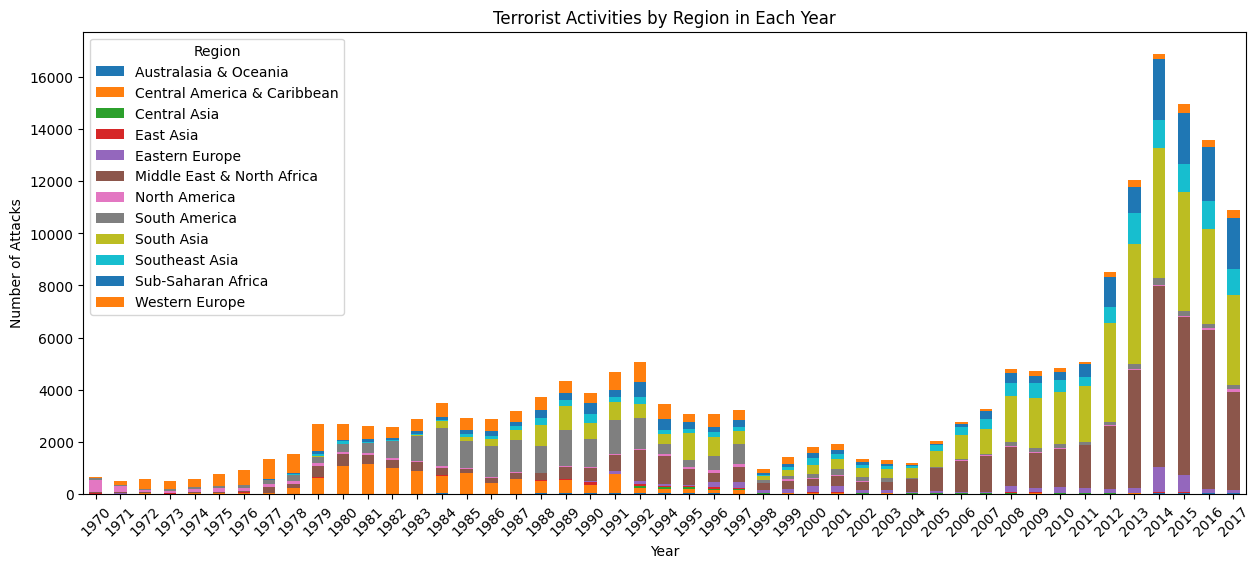

In [ ]:
# Create a stacked bar chart to show the number of attacks by region in each year
region_year_counts = pd.crosstab(terror['Year'], terror['Region'])
region_year_counts.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Terrorist Activities by Region in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate the total casualties (killed + wounded) for each attack
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['Casualties'] = terror['Killed'] + terror['Wounded']

In [ ]:
# Identify the top 40 worst terror attacks in history from 1982 to 2016
top_terror_attacks = terror.sort_values(by='Casualties', ascending=False)[:40]

In [ ]:
# Create a heatmap to visualize the top 40 worst attacks
heat = top_terror_attacks.pivot_table(index='Country', columns='Year', values='Casualties')
heat.fillna(0, inplace=True)


In [ ]:
# Plot the heatmap
import plotly.offline as py
import plotly.graph_objs as go

colorscale = [[0, '#edf8fb'], [0.3, '#00BFFF'], [0.6, '#8856a7'], [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis=dict(ticks='', nticks=20),
    yaxis=dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)

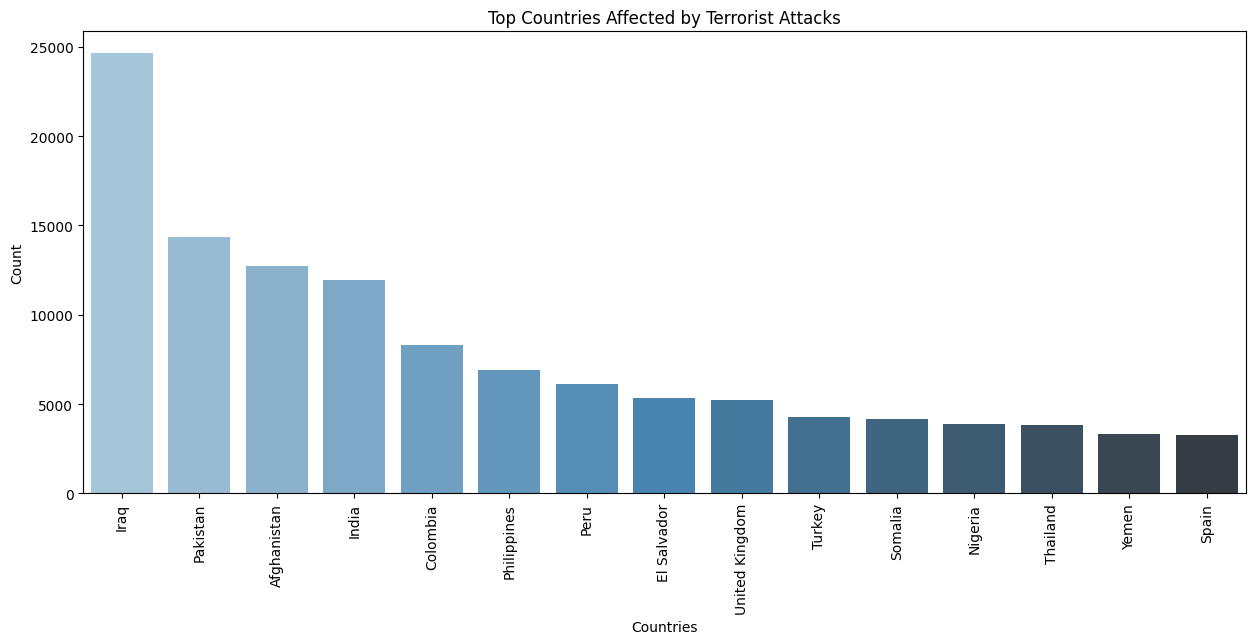

In [ ]:
# Calculate the top countries affected by terrorist attacks
top_countries_affected = terror['Country'].value_counts()[:15]

# Plot the top countries affected by terrorist attacks
plt.figure(figsize=(15, 6))
sns.barplot(x=top_countries_affected.index, y=top_countries_affected.values, palette='Blues_d')
plt.title('Top Countries Affected by Terrorist Attacks')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


***The analysis revealed trends in terrorist activities. The most affected country is Iraq, with many attacks in the Middle East. Bombings are the most common attack type, and casualties peaked in the 2010s.***